In [121]:
import numpy as np
import pandas as pd

### 0. 导入数据 

In [122]:
df=pd.read_csv("../../Datasets/listings_cleaned.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [123]:
df.head(2)

,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,nearby_sites_rating,nearest_station_dist,nearest_site_dist,nearest_site_rating
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,This is Room No. 2.(available after Jan 15 201...,NaN,266763,2010-10-20,I am a private tutor by profession. My husband...,within a few hours,100%,f,...,10.0,8.0,8.0,f,2,0.02,0.995731,0.617762,4.295315,4.595264
1,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,"I am a working professional, living in Singapo...",NaN,NaN,f,...,10.0,9.0,9.0,f,1,0.30,1.269606,0.399696,2.039236,4.654423


In [124]:
df.shape

(138263, 55)

#### 删除重复样本，每个房子只保留一条observation 

In [125]:
df=df.drop_duplicates(subset=["id"],keep="last")

In [126]:
df.shape

(15101, 55)

#### 重新设定index 

In [127]:
df=df.reset_index().drop(columns=["index"])

In [128]:
df.head(2)

,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,nearby_sites_rating,nearest_station_dist,nearest_site_dist,nearest_site_rating
0,729816,2 + 1 bedroom in Robertson Quay,a 2+1 bedroom unit in a modern condo in Robert...,It's in the middle of everything without the n...,3794008,2012-10-07,"25 years old Indonesian, been staying in Singa...",NaN,NaN,f,...,10.0,10.0,10.0,f,1,0.05,2.176037,0.817067,0.935811,4.5
1,1101652,Cozy place in singapore,Explore one of Singapore's best kept heritage ...,The condo is also a short walk to Parkway Para...,4156336,2012-11-15,Hey!\r\n\r\nWelcome to my cozy apartment . I f...,within a day,100%,f,...,10.0,9.0,9.0,f,1,0.29,1.135049,1.813440,3.174312,4.5


### 1. 筛选特征 

#### 1.1 主观筛选 

In [129]:
delete_columns=['name','neighborhood_overview','host_id','host_about','host_neighbourhood', 'neighbourhood_cleansed',
                'host_has_profile_pic', 'host_identity_verified','calendar_updated','number_of_reviews'
               ]

In [130]:
df2=df.drop(delete_columns,axis=1)

In [131]:
df2.shape

(15101, 45)

#### 1.2 客观筛选   <font color=#008000>未完成</font>

### 2. 处理特征 

#### 删除description, host_response_rate, host_response_time空值

In [132]:
df2.dropna(subset=["description", "host_response_rate", "host_response_time"],inplace=True)

#### host_is_superhost特征：填充空值并转化为数字

In [133]:
df2['host_is_superhost']=df2['host_is_superhost'].fillna('f')

In [134]:
df2.host_is_superhost=df2.host_is_superhost.replace({"t":1,
                                                     "f":0})

####  host_response_time特征：categorical转成数字

In [135]:
df2['host_response_time']=df2['host_response_time'].replace({'within an hour': 4,
                                                             'within a few hours': 3,
                                                             'within a day': 2, 
                                                             'a few days or more': 1})

####  host_response_rate：从字符串转化为小数

In [136]:
# host_response_rate convert to numbers
df2['host_response_rate']= df2['host_response_rate'].apply(lambda x:int(x[:-1])/100)

In [137]:
np.corrcoef(df2.host_response_time, df2.host_response_rate)

array([[1.        , 0.81646059],
       [0.81646059, 1.        ]])

说明二者的相关性还是挺强的，因此**feature cross综合成一个**

In [138]:
df2["host_response_time_cross_rate"]=df2.host_response_time*df2.host_response_rate

In [139]:
df2.drop(columns=['host_response_time','host_response_rate'],inplace=True)

#### host_verifications特征：拆分类别变成很多columns

In [140]:
# host_verifications fill na as ''
df2['host_verifications'] = df2['host_verifications'].fillna('')

In [141]:
# create new boolean columns
df2['email']= df2['host_verifications'].apply(lambda x: 1 if 'email' in x else 0)
df2['phone']= df2['host_verifications'].apply(lambda x: 1 if 'phone' in x else 0)
df2['reviews']= df2['host_verifications'].apply(lambda x: 1 if 'reviews' in x else 0)
df2['jumio']= df2['host_verifications'].apply(lambda x: 1 if 'jumio' in x else 0)
df2['offline_government_id']= df2['host_verifications'].apply(lambda x: 1 if 'offline_government_id' in x else 0)
df2['selfie']= df2['host_verifications'].apply(lambda x: 1 if 'selfie' in x else 0)
df2['government_id']= df2['host_verifications'].apply(lambda x: 1 if 'government_id' in x else 0)
df2['identity_manual']= df2['host_verifications'].apply(lambda x: 1 if 'identity_manual' in x else 0)
df2['work_email']= df2['host_verifications'].apply(lambda x: 1 if 'work_email' in x else 0)
df2['manual_online']= df2['host_verifications'].apply(lambda x: 1 if 'manual_online' in x else 0)
df2['manual_offline']= df2['host_verifications'].apply(lambda x: 1 if 'manual_offline' in x else 0)
# ['email', 'phone', 'manual_online', 'reviews', 'manual_offline', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']

In [142]:
df2[['email', 'phone', 'manual_online', 'reviews', 'manual_offline', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']]

,email,phone,manual_online,reviews,manual_offline,jumio,offline_government_id,selfie,government_id,identity_manual,work_email
1,1,1,0,1,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,1,1,1,1
4,1,1,0,1,0,1,1,1,1,1,0
7,1,1,0,1,0,1,0,0,1,0,1
8,1,1,0,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
15096,0,1,0,0,0,1,0,0,1,0,0
15097,1,1,0,0,0,0,0,0,0,0,1
15098,1,1,0,0,0,0,0,0,0,0,1
15099,1,1,0,0,0,0,0,0,0,0,1


In [143]:
df2.drop(columns=["host_verifications"],inplace=True)

#### neighbourhood_group_cleansed特征：


In [144]:
df2.neighbourhood_group_cleansed.value_counts()

Central Region       10415
West Region            668
East Region            554
North-East Region      367
North Region           218
Name: neighbourhood_group_cleansed, dtype: int64

In [145]:
df2=df2.reset_index(drop=True)

In [146]:
from sklearn.preprocessing import OneHotEncoder

In [148]:
enc = OneHotEncoder(categories='auto')
features = pd.DataFrame(enc.fit_transform(df2[['neighbourhood_group_cleansed']]).toarray(),columns=enc.get_feature_names())


In [149]:
df2=pd.concat([df2.drop(columns=['neighbourhood_group_cleansed']), features],axis=1)

####  property_type特征：合并小类

In [150]:
df2['property_type'] = df2['property_type'].str.lower()

In [151]:
def property_type(x):
    if 'apartment' in x:
        return 'apartment'
    elif 'condominium' in x:
        return 'condominium'
    elif 'townhouse' in x:
        return 'townhouse'
    elif 'serviced apartment' in x:
        return 'serviced apartment'
    elif 'boutique hotel' in x:
        return 'boutique hotel'
    elif 'hotel' in x:
        return 'hotel'
    elif 'hostel' in x:
        return 'hostel'
    elif 'loft' in x:
        return 'loft'
    elif 'guest suite' in x:
        return 'guest suite'
    elif 'bed and breakfast' in x:
        return 'bed and breakfast' 
    elif 'bungalow' in x:
        return 'bungalow' 
    elif 'house' in x:
        return 'house'
    elif 'villa' in x:
        return 'house'
    elif x in ['private room in earth house', 'private room', 'camper/rv', 
               'bus', 'shared room in hostel', 'castle', 'cabin', 'tent', 'cottage', 'campsite',
               "shared room","entire place", "igloo", "farm stay", "casa particular (cuba)", "entire chalet"
              ]:
        return 'other'
    else:
        return x
df2['property_type'] = df2['property_type'].apply(property_type)

In [152]:
df2['property_type'].value_counts()

apartment            6080
condominium          3664
house                 810
hostel                433
hotel                 285
boutique hotel        277
townhouse             217
loft                  147
bed and breakfast     104
bungalow               84
other                  75
guest suite            36
boat                   10
Name: property_type, dtype: int64

In [153]:
df2.shape

(12222, 58)

对df2里面的索引重新设定，因为我们之前dropna后没有重新设定索引，否则后面onehotencoder的时候会出问题

In [154]:
df2=df2.reset_index(drop=True)

In [155]:
enc = OneHotEncoder(categories='auto')
features = pd.DataFrame(enc.fit_transform(df2[['property_type']]).toarray(),columns=enc.get_feature_names())

In [156]:
df2=pd.concat([df2.drop(columns=['property_type']), features],axis=1)

In [157]:
df2.iloc[:,-10:]

,x0_boutique hotel,x0_bungalow,x0_condominium,x0_guest suite,x0_hostel,x0_hotel,x0_house,x0_loft,x0_other,x0_townhouse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12217,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12218,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12219,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12220,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### room_type特征：

In [158]:
df2['room_type'].value_counts()

Entire home/apt    6848
Private room       4452
Hotel room          585
Shared room         337
Name: room_type, dtype: int64

In [159]:
df2.room_type.isnull().value_counts()

False    12222
Name: room_type, dtype: int64

In [160]:
df2["room_type"]=df2.room_type.fillna("others")

In [161]:
enc = OneHotEncoder(categories='auto')
features = pd.DataFrame(enc.fit_transform(df2[['room_type']]).toarray(),columns=enc.get_feature_names())

In [162]:
df2=pd.concat([df2.drop(columns=['room_type']), features],axis=1)

In [163]:
df2.iloc[:,-5:]

,x0_townhouse,x0_Entire home/apt,x0_Hotel room,x0_Private room,x0_Shared room
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
12217,0.0,0.0,0.0,1.0,0.0
12218,0.0,0.0,0.0,1.0,0.0
12219,0.0,0.0,0.0,1.0,0.0
12220,0.0,0.0,0.0,1.0,0.0


#### accommodates, bathrooms, bedrooms, beds 特征处理 ：填充空值

空值均用0来填充

可能存在1.5, 2.5等这种小数，这是正常的。(杨大佬解释)

In [164]:
df2["bathrooms"]=df2.bathrooms.fillna(0)
df2["bedrooms"]=df2.bedrooms.fillna(0)
df2["beds"]=df2.beds.fillna(0)

#### amenities特征：将标签提取出来 然后 分类整合 然后 onehot 

In [165]:
df2["amenities_list"] = df2.amenities.apply(lambda x:x[1:-1].replace('"',"").split(","))
df2["amenities_list"] = df2["amenities_list"].apply(lambda lst: list(x.strip() for x in lst))

In [166]:
lists=df2.amenities_list.values

In [167]:
from collections import Counter
result=[]

for lst in lists:
    result += lst
    
seq = Counter(result)

In [168]:
seq.most_common()

[('Wifi', 11984),
 ('Air conditioning', 11968),
 ('Essentials', 11099),
 ('Washer', 11030),
 ('Hangers', 10361),
 ('Kitchen', 10312),
 ('Iron', 9950),
 ('Hair dryer', 9889),
 ('Shampoo', 9380),
 ('TV', 9356),
 ('Dryer', 8117),
 ('Elevator', 7977),
 ('Hot water', 7745),
 ('Pool', 6347),
 ('Lock on bedroom door', 6079),
 ('Long term stays allowed', 5871),
 ('Refrigerator', 5744),
 ('Gym', 5171),
 ('Microwave', 5112),
 ('Dishes and silverware', 4910),
 ('Fire extinguisher', 4813),
 ('Bed linens', 4706),
 ('Stove', 4335),
 ('Heating', 4133),
 ('Laptop friendly workspace', 4038),
 ('Cooking basics', 3719),
 ('Private entrance', 3605),
 ('Free parking on premises', 3500),
 ('Dedicated workspace', 3288),
 ('First aid kit', 3190),
 ('Luggage dropoff allowed', 2946),
 ('Extra pillows and blankets', 2795),
 ('Smoke alarm', 2760),
 ('Host greets you', 2462),
 ('Smoke detector', 2291),
 ('Pets allowed', 2287),
 ('Oven', 2280),
 ('Paid parking off premises', 2160),
 ('Cable TV', 1752),
 ('Family/ki

In [169]:
# select important amenities referred to https://www.airbnb.com.sg/resources/hosting-homes/a/the-best-amenities-to-offer-right-now-203

select = ['Wifi', 'Air conditioning', 'Kitchen', 'Parking', 'Outdoor', 
         'Kids', 'Pets allowed', 'Workspace', 'Gym', 'Breakfast']

In [170]:
df2['Wifi'] = df2['amenities_list'].apply(lambda lst: 1 if any([ame in lst for ame in 
                                                                ['Wifi', 'Wifi \\u2013 1000 Mbps']]) else 0)

df2['Air conditioning'] = df2['amenities_list'].apply(lambda lst: 1 if any([ame in lst for ame in 
                                                                ['Air conditioning', 'Central air conditioning']]) else 0)

df2['Kitchen'] = df2['amenities_list'].apply(lambda lst: 1 if 'Kitchen' in lst else 0)

df2['Parking'] = df2['amenities'].apply(lambda string: 1 if 'parking' in string else 0)

df2['Outdoor'] = df2['amenities_list'].apply(lambda lst: 1 if any([ame in lst for ame in 
                                                                ['Patio or balcony', 'Barbecue utensils', 'BBQ grill']]) else 0)


df2['Kids'] = df2['amenities_list'].apply(lambda lst: 1 if any([ame in lst for ame in 
                                                                ['Baby bath','Baby monitor','Babysitter recommendations']]) else 0)

df2['Pets allowed'] = df2['amenities_list'].apply(lambda lst: 1 if 'Pets allowed' in lst else 0)

df2['Workspace'] = df2['amenities_list'].apply(lambda lst: 1 if any([ame in lst for ame in 
                                                                ['Laptop-friendly workspace', 'Laptop friendly workspace']]) else 0)

df2['Gym'] = df2['amenities_list'].apply(lambda lst: 1 if 'Gym' in lst else 0)

df2['Breakfast'] = df2['amenities_list'].apply(lambda lst: 1 if 'Breakfast' in lst else 0)


In [171]:
df2[select]

,Wifi,Air conditioning,Kitchen,Parking,Outdoor,Kids,Pets allowed,Workspace,Gym,Breakfast
0,1,1,1,1,0,0,0,0,0,0
1,1,1,1,0,0,1,0,1,1,0
2,1,1,1,1,0,0,0,1,0,0
3,1,1,1,0,0,0,0,1,0,0
4,1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
12217,1,1,1,0,0,0,0,0,0,0
12218,1,1,1,0,0,0,0,0,0,0
12219,1,1,1,0,0,0,0,0,0,0
12220,1,1,1,0,0,0,0,0,0,0


In [172]:
# df2.amenities.apply(lambda x:len(x.split(","))).value_counts().sort_index(ascending=False)

#### price特征：字符串转化为小数  表示住一晚上的价格

In [173]:
df2.price.isnull().value_counts()

False    12222
Name: price, dtype: int64

In [174]:
df2["price"]=df2.price.apply(lambda x:float(x[1:].replace(",",""))) #只能搞一次！！！

#### 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights' 等类似特征：删除相关程度高的特征

In [175]:
df3=df[['minimum_nights',
   'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
   'minimum_maximum_nights', 'maximum_maximum_nights',
   'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',]]

In [176]:
df3.head(2)

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,180,330,180,180,330,330,180.0,330.0
1,5,800,5,5,800,800,5.0,800.0


In [177]:
df3.isnull().value_counts() #震惊！没有缺失值

minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm
False           False           False                   False                   False                   False                   False                   False                     15101
dtype: int64

In [178]:
corrMatrix=df3.corr()

In [179]:
import seaborn as sn

<AxesSubplot:>

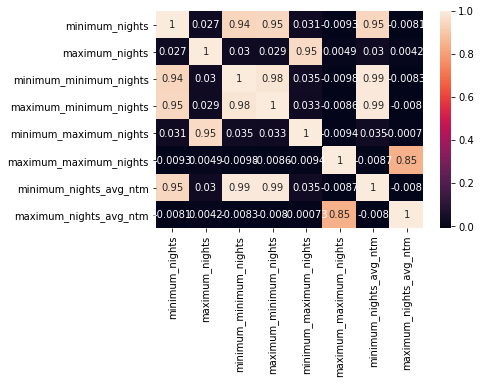

In [180]:
sn.heatmap(corrMatrix,annot=True)

我们发现 "minimum_nights"和'minimum_minimum_nights', 'maximum_minimum_nights'的关联程度特别高

经过严谨的分析，我们保留三个特征：'minimum_nights', 'maximum_nights','maximum_nights_avg_ntm'

因此删除'minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights',

'minimum_nights_avg_ntm' 这些特征

**可以用PCA之后处理**

In [181]:
df2.drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights',
                  'minimum_maximum_nights', 'maximum_maximum_nights',
                  'minimum_nights_avg_ntm'],inplace=True)

####  'availability_30/60/90/365' 系列：整合成一个范围在(0,1)特征

我们已经检查过了，没有缺失值

In [182]:
df2.availability_30 = df2.availability_30/30
df2.availability_60 = df2.availability_60/60
df2.availability_90 = df2.availability_90/90
df2.availability_365 = df2.availability_365/365

In [183]:
df2["availability_average"] = (df2.availability_30+df2.availability_60+df2.availability_90+df2.availability_365)/4

然后删除 availability_30/60/90/365

In [184]:
df2.drop(columns=["availability_30","availability_60","availability_90","availability_365"], inplace=True)

#### number_of_reviews_ltm特征：表示这个房子火爆程度

In [185]:
df2.number_of_reviews_ltm.isnull().value_counts()

False    12222
Name: number_of_reviews_ltm, dtype: int64

#### review_scores_rating系列：删除空值  并 整合这些特征feature cross <font color=#008000>(未完成)</font>

In [186]:
df2[['review_scores_rating',
       #'review_scores_accuracy', 'review_scores_cleanliness',
       #'review_scores_checkin', 'review_scores_communication',
       #'review_scores_location', 'review_scores_value'
    ]].isnull().value_counts()

review_scores_rating
False                   7293
True                    4929
dtype: int64

我们发现<font color=red>**缺失值较多**</font>，不过我们可以到时候用comments产生sentimental score来辅助分析

原因在于有很多房子是没有人住过，或者住过但并没有给出评论的，这些房子肯定大多数是那种不太火的房子

我们准备使用sentimental score来替代，因此删除这些特征。而且，对于listings表来说，review特征的意义不大

In [187]:
df2.drop(columns=['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'
    ],inplace=True)

#### instant_bookable特征 : 将T和F转化为数字

In [188]:
df2.instant_bookable.isnull().value_counts()

False    12222
Name: instant_bookable, dtype: int64

In [189]:
df2.instant_bookable=df2.instant_bookable.apply(lambda x:1 if x=="t" else 0)

#### calculated_host_listings_count特征

In [190]:
df2.calculated_host_listings_count.isnull().value_counts()

False    12222
Name: calculated_host_listings_count, dtype: int64

#### reviews_per_month特征

In [191]:
df2.reviews_per_month.isnull().value_counts()

False    7452
True     4770
Name: reviews_per_month, dtype: int64

缺失值太多，删除此特征

In [192]:
df2.drop(columns=["reviews_per_month"],inplace=True)

### 3.导出文件

In [193]:
df2.to_csv("../终版数据/listings_final_version.csv",index=False)